# pandas_exercises

Create a notebook or python script named `pandas_exercises` to do your work for this exercise.

For the following exercises, you'll need to load several datasets using the `pydataset` library. (If you get an error when trying to run the import below use `pip` to install the `pydataset` package.)

In [238]:
from pydataset import data

When the instructions say to load a dataset, you can pass the name of the dataset as string to the `data` function to load the dataset. You can also view the documentation for the data set by passing the `show_doc` keyword agrument.

In [239]:
mpg = data('mpg') #load the dataset and store it in a variable 
data('mpg',show_doc=True) #view the documentation for the dataset.

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




1. Load the `mpg` dataset. Read the documentation for it, and use the data to answer these questions.
    * On average, which manufacturer has the best miles per gallon?

In [240]:
import math
import pandas as pd
import numpy as np
import matplotlib as plt
mpg = data('mpg')

In [241]:
# mpg['average_mileage'] = (mpg.hwy+mpg.cty)/2
# mpg['average_mileage']
# mpg[['manufacturer','average_mileage']]

avg_city_mileage = mpg.groupby('manufacturer').cty.mean()
avg_highway_mileage = mpg.groupby('manufacturer').hwy.mean()

((avg_city_mileage + avg_highway_mileage)/2).sort_values(ascending = False).head(1)





manufacturer
honda    28.5
dtype: float64

* How many different manufacturers are there?

In [242]:
mpg['manufacturer'].nunique()

15

* How many different models are there?

In [243]:
mpg['model'].nunique()

38

- Do automatic or manual cars have better miles per gallon?

In [244]:
mpg['transmission'] = mpg['trans'].str.split("(").str[0]
mpg['average_mileage'] = (mpg['hwy'] + mpg['cty'])/2

mpg[['transmission','average_mileage']].groupby('transmission').mean().sort_values('average_mileage', ascending = False)

,average_mileage
transmission,
manual,22.227273
auto,19.130573


#### 2. Joining and Merging

Copy `users` and `roles` dataframes. What to you think a `right` join would look like? An `outer` join? What happens if you drop the foreign keys from the dataframes and try to merge them?

In [245]:
users = pd.DataFrame({
        'id' : [1, 2, 3, 4, 5, 6],
        'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
        'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
roles = pd.DataFrame({
        'id': [1, 2, 3, 4],
        'name': ['admin', 'author', 'reviewer', 'commenter']
})

In [246]:
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [247]:
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [248]:
pd.merge(users, roles, left_on = 'role_id', right_on = 'id', how = 'right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [249]:
pd.merge(users, roles, left_on = 'role_id', right_on = 'id', how = 'outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [250]:
pd.merge(users, roles, how = 'right')

,id,name,role_id
0,1,admin,NaN
1,2,author,NaN
2,3,reviewer,NaN
3,4,commenter,NaN


In [251]:
pd.merge(users, roles, how = 'outer')

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN
6,1,admin,NaN
7,2,author,NaN
8,3,reviewer,NaN
9,4,commenter,NaN


In [252]:
pd.merge(users, roles, how = 'left')

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


3. Getting data from SQL databases

    a. Create a function named `get_db_url`. It should accept a username, hostname, password, and database name and return a url formated like in the examples in this lesson.

In [253]:
from env import host, user, password
def get_db_url(user, host, password, database_name):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url

   b. Use your function to obtain a connection to the `employees` database.

In [254]:
employees_database_connection = get_db_url(user, host, password, 'employees')

c. Once you successfully run a query:
- Intentionally make a typo in the database url. What kind of error message do you see?

In [255]:
# url = get_db_url(user, host, password, 'test')
url = get_db_url(user, host, password, 'employees')

In [256]:
pd.read_sql('SELECT * FROM employees LIMIT 5', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


- Intentionally make an error in your sql query. What does the error message look like?

In [257]:
pd.read_sql('SELECT * FROM test LIMIT 5', url)

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.test' doesn't exist")
[SQL: SELECT * FROM test LIMIT 5]
(Background on this error at: http://sqlalche.me/e/f405)

d. Read the `employees ` and `titles` tables into two separate dataframes.

In [258]:
employees_table = pd.read_sql('SELECT * FROM employees', url)
employees_table

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [259]:
title_table = pd.read_sql('SELECT * FROM titles', url)
title_table

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01
6,10005,Staff,1989-09-12,1996-09-12
7,10006,Senior Engineer,1990-08-05,9999-01-01
8,10007,Senior Staff,1996-02-11,9999-01-01
9,10007,Staff,1989-02-10,1996-02-11


### e. Visualize the number of employees with each title

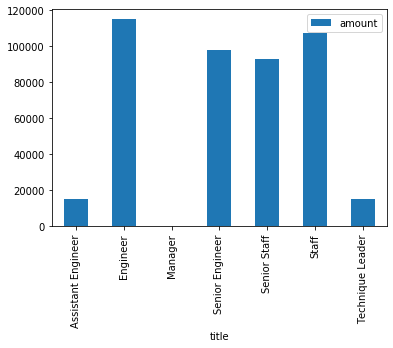

In [260]:
title_table_count = pd.read_sql('SELECT title, count(*) as amount FROM titles GROUP BY title', url)
title_table_count.plot.bar(x = 'title')

### f. Join the employees and titles dataframes together.

In [261]:
employees_titles = pd.merge(employees_table, title_table, left_on = 'emp_no', right_on = 'emp_no', how = 'left')

### g. Visualize how frequently employees change titles.

In [262]:
employees_titles.head(3)

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01


In [263]:
employees_titles.describe()

,emp_no
count,443308.000000
mean,253075.034430
std,161853.292613
min,10001.000000
25%,84855.750000
50%,249847.500000
75%,424891.250000
max,499999.000000


In [281]:
employees_titles.groupby(['emp_no']).title.count().sort_values(ascending=False)

emp_no
402226    3
92117     3
246056    3
246029    3
245911    3
92267     3
26165     3
92276     3
469999    3
245642    3
245540    3
26019     3
245458    3
245384    3
25945     3
25941     3
92632     3
245218    3
92645     3
25875     3
245168    3
469704    3
26301     3
468860    3
26307     3
247283    3
468940    3
247184    3
247115    3
91661     3
469122    3
469238    3
91793     3
246779    3
26494     3
246687    3
91858     3
469344    3
246654    3
469462    3
92016     3
246354    3
246314    3
246293    3
92667     3
245145    3
470448    3
245071    3
471022    3
93126     3
244229    3
244187    3
471132    3
471188    3
25429     3
244068    3
244045    3
93287     3
244000    3
93295     3
471340    3
25359     3
93349     3
25348     3
471391    3
243806    3
243730    3
471017    3
470992    3
93089     3
470696    3
245028    3
92770     3
470568    3
92819     3
244874    3
244826    3
470681    3
244760    3
92927     3
244409    3
470749    3
244664   

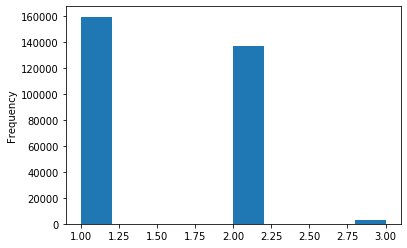

In [264]:
employees_titles.groupby('emp_no').title.count().plot.hist()

### h. for each title, find the hire date of the employee that was hired most recently with that title

In [290]:
# employees_titles[['title','from_date']]
employees_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 9 columns):
emp_no        443308 non-null int64
birth_date    443308 non-null object
first_name    443308 non-null object
last_name     443308 non-null object
gender        443308 non-null object
hire_date     443308 non-null object
title         443308 non-null object
from_date     443308 non-null object
to_date       443308 non-null object
dtypes: int64(1), object(8)
memory usage: 33.8+ MB


In [361]:
# s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 1000)
# s.head()
# pd.to_datetime(s,infer_datetime_format=True)
employees_titles['hire_date'] = pd.to_datetime(employees_titles['hire_date'],infer_datetime_format=True)
#employees_titles[employees_titles['hire_date'] == employees_titles['hire_date'].max()]
#title_hire_date = employees_titles.groupby(['title','hire_date']).hire_date.max()

employees_titles.groupby('title').hire_date.max()



title
Assistant Engineer   1999-12-24
Engineer             2000-01-28
Manager              1992-02-05
Senior Engineer      2000-01-01
Senior Staff         2000-01-13
Staff                2000-01-12
Technique Leader     1999-12-31
Name: hire_date, dtype: datetime64[ns]

### i. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [365]:
url = get_db_url(user, host, password, 'employees')
employees_titles_departments = pd.read_sql("SELECT * FROM titles LEFT JOIN dept_emp using (emp_no) LEFT JOIN departments using (dept_no) WHERE dept_emp.to_date = '9999-01-01' and titles.to_date = '9999-01-01'", url)
# employees_titles_departments.head()



,dept_no,emp_no,title,from_date,to_date,from_date,to_date,dept_name
0,d005,10001,Senior Engineer,1986-06-26,9999-01-01,1986-06-26,9999-01-01,Development
1,d007,10002,Staff,1996-08-03,9999-01-01,1996-08-03,9999-01-01,Sales
2,d004,10003,Senior Engineer,1995-12-03,9999-01-01,1995-12-03,9999-01-01,Production
3,d004,10004,Senior Engineer,1995-12-01,9999-01-01,1986-12-01,9999-01-01,Production
4,d003,10005,Senior Staff,1996-09-12,9999-01-01,1989-09-12,9999-01-01,Human Resources


In [370]:
employees_titles_departments.head()
pd.crosstab(employees_titles_departments.dept_name, employees_titles_departments.title, margins = True)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader,All
dept_name,,,,,,,,
Customer Service,68,627,1,1790,11268,3574,241,17569
Development,1652,14040,1,38816,1085,315,5477,61386
Finance,0,0,1,0,9545,2891,0,12437
Human Resources,0,0,1,0,9824,3073,0,12898
Marketing,0,0,1,0,11290,3551,0,14842
Production,1402,12081,1,33625,1123,349,4723,53304
Quality Management,389,3405,1,9458,0,0,1293,14546
Research,77,830,1,2250,9092,2870,321,15441
Sales,0,0,1,0,28797,8903,0,37701


## 4. Use your get_db_url function to help you explore the data from the `chipotle` database. Use the data to answer the following questions:

In [265]:
url = get_db_url(user, host, password, 'chipotle')

In [266]:
chipotle = pd.read_sql('SELECT * FROM orders', url)
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
6,7,3,1,Side of Chips,nan,$1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25


###  What is the total price for each order?

In [267]:
type(chipotle)

pandas.core.frame.DataFrame

In [268]:
chipotle['item_price'] = chipotle['item_price'].str.replace('$', '')
# chipotle['item_price'].describe()
# chipotle['item_price'] = chipotle['item_price'].astype(float)
# chipotle.describe



In [269]:
# chipotle['item_price'].describe()
chipotle['item_price'] = chipotle['item_price'].astype(float)
# chipotle.describe

In [270]:
chipotle.dtypes

id                      int64
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [271]:
chipotle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
id                    4622 non-null int64
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    4622 non-null object
item_price            4622 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.7+ KB


In [272]:
chipotle.groupby('order_id').item_price.sum()

order_id
1        11.56
2        16.98
3        12.67
4        21.00
5        13.70
6        17.50
7        15.70
8        10.88
9        10.67
10       13.20
11       12.38
12       14.37
13       10.88
14       10.08
15       10.88
16       10.68
17       10.08
18       24.90
19       13.90
20       36.20
21       23.36
22       12.98
23       11.17
24       12.07
25       11.38
26       20.50
27       13.90
28       33.70
29       17.98
30       23.36
31       10.68
32       12.98
33       13.20
34       28.40
35       13.40
36       18.00
37       18.00
38       18.57
39       12.20
40       32.75
41       16.20
42       13.70
43       20.50
44       13.20
45       21.97
46       11.88
47       10.08
48       13.70
49       16.15
50       10.88
51       18.57
52       12.98
53       22.45
54       15.70
55       10.08
56       16.65
57       16.20
58       10.88
59       10.98
60       22.50
61       16.20
62       15.70
63       15.70
64       22.50
65       25.45
66       11.48
6

In [273]:
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [274]:
(chipotle.groupby('item_name').quantity.sum().sort_values(ascending = False)).head(3)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

- Which item has produced the most revenue?

In [275]:
chipotle['revenue'] = chipotle['quantity'] * chipotle['item_price']

In [276]:
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39,2.39
1,2,1,1,Izze,[Clementine],3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,33.96


In [282]:
chipotle.groupby('item_name').revenue.sum().sort_values(ascending=False).head()

item_name
Chicken Bowl           8044.63
Chicken Burrito        6387.06
Steak Burrito          4236.13
Steak Bowl             2479.81
Chips and Guacamole    2475.62
Name: revenue, dtype: float64